In [21]:
import pandas as pd
import numpy as np

# 데이터 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 split
from sklearn.model_selection import train_test_split

# 회귀분석
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from sklearn.feature_selection import RFE

# 선형회귀모델
from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeRegressor

# 앙상블 모델
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV

# 평가함수
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.preprocessing import StandardScaler

# grhpviz
from sklearn.tree import export_graphviz

import graphviz


# 주피터 노트북 사용시 그래프 자동 출력 옵션
%matplotlib inline

# 폰트 설정
matplotlib.rc('font', family = "NanumGothic")
plt.rc('font', family = "NanumGothic")
plt.rcParams["font.family"] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

# 미세먼지 데이터 분석

- 목표변수: PM10 (미세멍지 농도)
- 설명변수: 날씨 및 화학적 변화 가능성 확인

## 1. 데이터 구성

In [3]:
df_raw = pd.read_csv("./Data/AIR_POLLUTION.csv")
df_raw.head()

,MeasDate,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
0,2019-07-01,29.0,0.054,0.021,0.5,0.003,24.03,0.0,2.30,249,63.2,995.1,0.0,5.70
1,2019-07-02,26.0,0.053,0.020,0.5,0.003,24.29,0.0,2.26,265,63.2,998.6,0.0,3.83
2,2019-07-03,30.0,0.042,0.023,0.4,0.003,24.18,0.0,1.79,280,65.3,998.3,0.0,6.29
3,2019-07-04,28.0,0.034,0.026,0.4,0.003,25.35,0.0,2.04,263,58.6,996.6,0.0,2.54
4,2019-07-05,29.0,0.045,0.035,0.5,0.003,27.30,0.0,1.45,175,45.5,993.5,0.0,3.92


### 데이터 전처리

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MeasDate   366 non-null    object 
 1   PM10       365 non-null    float64
 2   O3         365 non-null    float64
 3   NO2        365 non-null    float64
 4   CO         311 non-null    float64
 5   SO2        365 non-null    float64
 6   TEMP       366 non-null    float64
 7   RAIN       366 non-null    float64
 8   WIND       366 non-null    float64
 9   WIND_DIR   366 non-null    int64  
 10  HUMIDITY   366 non-null    float64
 11  ATM_PRESS  366 non-null    float64
 12  SNOW       366 non-null    float64
 13  CLOUD      366 non-null    float64
dtypes: float64(12), int64(1), object(1)
memory usage: 40.2+ KB


#### 결측치 제거

- 366개 데이터 중 S02 C0, Pm10, 03, N-2에 null데이터가 존재하는 것으로 보임.
- C0데이터의 경우 null데이터가 많아 보이므로 평균치를 넣어줄 계획이다.

In [5]:
df_raw.isnull().sum() # NaN 값이 있는 개수 확인

# 328번 문제있으므로 지운다.z
df_raw.loc[df_raw.isnull()["PM10"]]
df_raw.drop([328], inplace=True)

In [6]:
df_raw.groupby("CO")["CO"].transform("mean")

0      0.5
1      0.5
2      0.4
3      0.4
4      0.5
      ... 
361    0.4
362    0.4
363    0.4
364    0.6
365    0.3
Name: CO, Length: 365, dtype: float64

In [7]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 365
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MeasDate   365 non-null    object 
 1   PM10       365 non-null    float64
 2   O3         365 non-null    float64
 3   NO2        365 non-null    float64
 4   CO         311 non-null    float64
 5   SO2        365 non-null    float64
 6   TEMP       365 non-null    float64
 7   RAIN       365 non-null    float64
 8   WIND       365 non-null    float64
 9   WIND_DIR   365 non-null    int64  
 10  HUMIDITY   365 non-null    float64
 11  ATM_PRESS  365 non-null    float64
 12  SNOW       365 non-null    float64
 13  CLOUD      365 non-null    float64
dtypes: float64(12), int64(1), object(1)
memory usage: 42.8+ KB


In [8]:
CO_mean = np.mean(df_raw["CO"])
df_raw.loc[df_raw.isnull()["CO"]] = round(CO_mean, 1)

In [9]:
# 이상치 제거 확인
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 365
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MeasDate   365 non-null    object 
 1   PM10       365 non-null    float64
 2   O3         365 non-null    float64
 3   NO2        365 non-null    float64
 4   CO         365 non-null    float64
 5   SO2        365 non-null    float64
 6   TEMP       365 non-null    float64
 7   RAIN       365 non-null    float64
 8   WIND       365 non-null    float64
 9   WIND_DIR   365 non-null    float64
 10  HUMIDITY   365 non-null    float64
 11  ATM_PRESS  365 non-null    float64
 12  SNOW       365 non-null    float64
 13  CLOUD      365 non-null    float64
dtypes: float64(13), object(1)
memory usage: 42.8+ KB


In [10]:
df_raw.describe().round(3)

,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
count,365.000,365.000,365.000,365.000,365.000,365.000,365.000,365.000,365.000,365.000,365.000,365.000,365.000
mean,30.304,0.094,0.097,0.515,0.077,10.068,0.330,2.020,178.797,49.788,858.213,0.097,4.126
std,19.370,0.170,0.168,0.141,0.177,9.265,0.953,0.904,99.414,24.374,357.968,0.279,3.159
min,0.500,0.002,0.008,0.300,0.002,-7.950,0.000,0.500,0.500,0.500,0.500,0.000,0.000
25%,20.000,0.016,0.020,0.400,0.003,0.600,0.000,1.580,103.000,41.600,996.400,0.000,0.830
50%,30.000,0.025,0.029,0.500,0.003,8.960,0.000,1.980,203.000,55.500,1006.200,0.000,3.880
75%,42.000,0.037,0.042,0.600,0.004,18.030,0.500,2.540,263.000,64.900,1011.600,0.000,6.960
max,101.000,0.500,0.500,1.000,0.500,29.870,11.800,4.830,340.000,95.000,1025.500,3.200,10.000


In [11]:
df_raw_y = df_raw["PM10"]
df_raw_x = df_raw.drop(["PM10", "MeasDate"], axis=1)
df_raw_datedrop = df_raw.drop(["MeasDate"], axis=1)
df_raw_x.head()

,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
0,0.054,0.021,0.5,0.003,24.03,0.0,2.30,249.0,63.2,995.1,0.0,5.70
1,0.053,0.020,0.5,0.003,24.29,0.0,2.26,265.0,63.2,998.6,0.0,3.83
2,0.042,0.023,0.4,0.003,24.18,0.0,1.79,280.0,65.3,998.3,0.0,6.29
3,0.034,0.026,0.4,0.003,25.35,0.0,2.04,263.0,58.6,996.6,0.0,2.54
4,0.045,0.035,0.5,0.003,27.30,0.0,1.45,175.0,45.5,993.5,0.0,3.92


In [12]:
print(df_raw_x.shape, df_raw_y.shape)

(365, 12) (365,)


#### 이상치 확인
- 히스토그램, 박스플롯, 스캐터 플롯으로 이상치를 확인한다.

<AxesSubplot:>

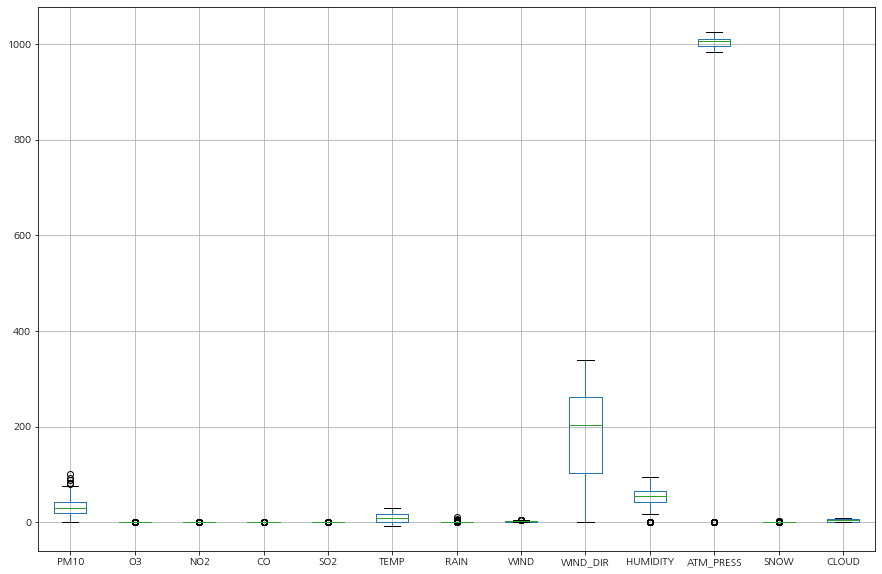

In [13]:
## 박스 플롯
df_raw_datedrop.boxplot(figsize = (15, 10))
# df_raw["PM10"].unique()

- ATMPRESS의 경우 단위가 너무 커서 박스 플롯에서 높게 나타나는 것 같아보인다.
- 데이터별로 단위가 차이가 나서 박스 플롯 비교가 힘들어 보인다. 따라서 이상치 확인을 위해 scale을 변환시켜서 확인해보고자 한다.

### 데이터 scailing

In [14]:
x_cols = df_raw_datedrop.columns

scaler = StandardScaler()
nd_scaled = scaler.fit_transform(df_raw_datedrop)

# 변환된 데이터 및 형태 확인
print("Scaled Data: \n {}".format(nd_scaled[:5].round(3)))
print("Shape: \n {}".format(nd_scaled.shape))

Scaled Data: 
 [[-0.067 -0.234 -0.454 -0.103 -0.417  1.509 -0.347  0.311  0.707  0.551
   0.383 -0.348  0.499]
 [-0.223 -0.239 -0.46  -0.103 -0.417  1.537 -0.347  0.266  0.868  0.551
   0.393 -0.348 -0.094]
 [-0.016 -0.304 -0.442 -0.812 -0.417  1.525 -0.347 -0.254  1.019  0.637
   0.392 -0.348  0.686]
 [-0.119 -0.351 -0.424 -0.812 -0.417  1.652 -0.347  0.023  0.848  0.362
   0.387 -0.348 -0.503]
 [-0.067 -0.287 -0.371 -0.103 -0.417  1.863 -0.347 -0.631 -0.038 -0.176
   0.378 -0.348 -0.065]]
Shape: 
 (365, 13)


In [15]:
# StandScale한 값 데이터프레임으로 변환
df_scaled = pd.DataFrame(nd_scaled, columns=x_cols)
df_scaled.head().round(3)

,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
0,-0.067,-0.234,-0.454,-0.103,-0.417,1.509,-0.347,0.311,0.707,0.551,0.383,-0.348,0.499
1,-0.223,-0.239,-0.460,-0.103,-0.417,1.537,-0.347,0.266,0.868,0.551,0.393,-0.348,-0.094
2,-0.016,-0.304,-0.442,-0.812,-0.417,1.525,-0.347,-0.254,1.019,0.637,0.392,-0.348,0.686
3,-0.119,-0.351,-0.424,-0.812,-0.417,1.652,-0.347,0.023,0.848,0.362,0.387,-0.348,-0.503
4,-0.067,-0.287,-0.371,-0.103,-0.417,1.863,-0.347,-0.631,-0.038,-0.176,0.378,-0.348,-0.065


In [16]:
df_scaled.describe().round(3)

,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
count,365.000,365.000,365.000,365.000,365.000,365.000,365.000,365.000,365.000,365.000,365.000,365.000,365.000
mean,-0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000
std,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001
min,-1.541,-0.540,-0.531,-1.522,-0.423,-1.947,-0.347,-1.684,-1.796,-2.025,-2.399,-0.348,-1.308
25%,-0.533,-0.458,-0.460,-0.812,-0.417,-1.023,-0.347,-0.487,-0.763,-0.336,0.387,-0.348,-1.045
50%,-0.016,-0.404,-0.406,-0.103,-0.417,-0.120,-0.347,-0.044,0.244,0.235,0.414,-0.348,-0.078
75%,0.605,-0.334,-0.329,0.606,-0.412,0.861,0.179,0.577,0.848,0.621,0.429,-0.348,0.899
max,3.655,2.395,2.396,3.444,2.400,2.140,12.055,3.115,1.624,1.857,0.468,11.143,1.862


<AxesSubplot:>

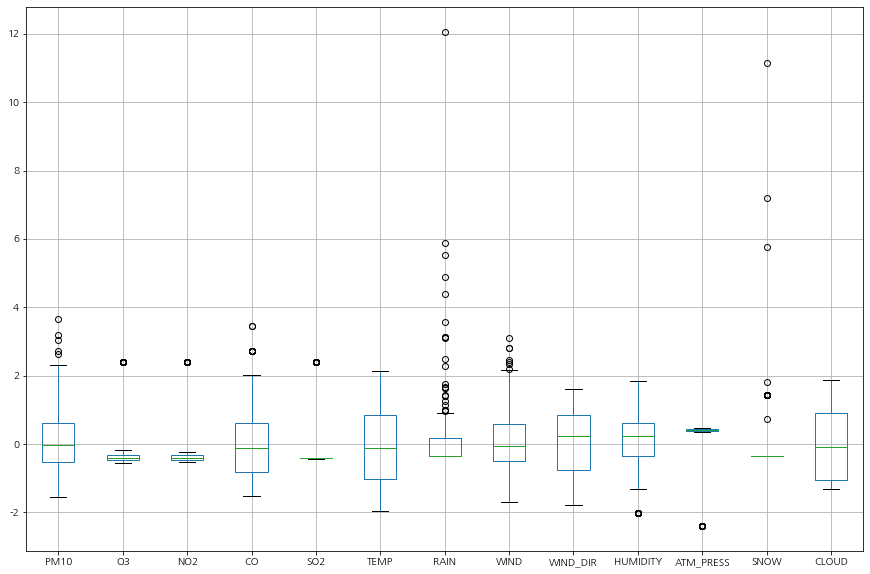

In [17]:
df_scaled.boxplot(figsize = (15, 10))

- 다른 데이터보다는 PM10과 RAIN SNOW데이터에서 어느정도 이상치가 있는 것으로 보여진다.
    - 하지만 PM10의 경우 unique로 데이터 확인해본 결과 미세먼지의 농도가 나쁜 날일 경우 충분히 나올 수 있는 데이터라고 생각이 되어 놔두도록 한다.
    - 또한 눈이나 비같은 경우 최대치의 경우 눈은 3cm이고, 비는 11mm이다. 이런 측청 치는 홍수나, 폭설 등 기존보다 많이 올 수 있는 경우가 존재할 수 있다고 생각해 남겨두도록 하겠다.

## 2. 탐색적분석

### 분포확인 

array([[<AxesSubplot:title={'center':'PM10'}>,
        <AxesSubplot:title={'center':'O3'}>,
        <AxesSubplot:title={'center':'NO2'}>,
        <AxesSubplot:title={'center':'CO'}>],
       [<AxesSubplot:title={'center':'SO2'}>,
        <AxesSubplot:title={'center':'TEMP'}>,
        <AxesSubplot:title={'center':'RAIN'}>,
        <AxesSubplot:title={'center':'WIND'}>],
       [<AxesSubplot:title={'center':'WIND_DIR'}>,
        <AxesSubplot:title={'center':'HUMIDITY'}>,
        <AxesSubplot:title={'center':'ATM_PRESS'}>,
        <AxesSubplot:title={'center':'SNOW'}>],
       [<AxesSubplot:title={'center':'CLOUD'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

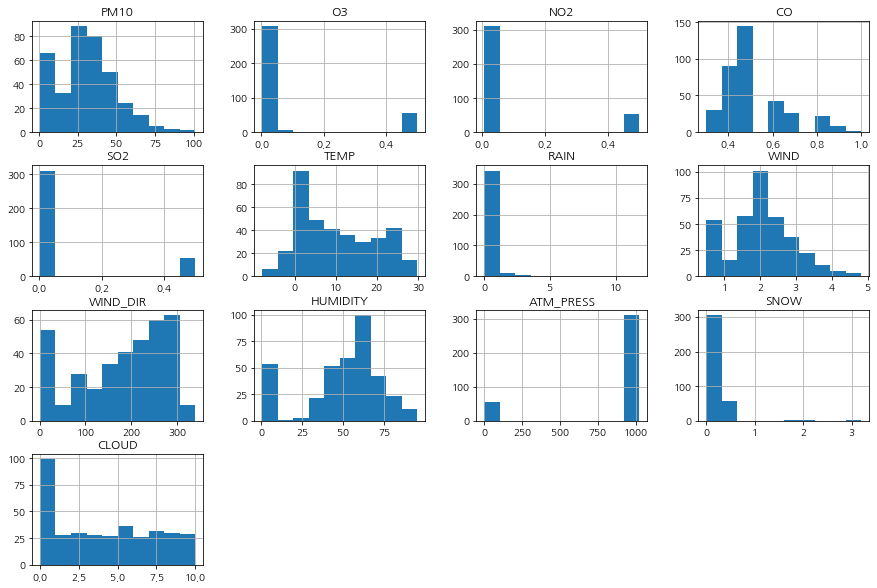

In [20]:
# 히스토그램
df_raw.hist(figsize = (15, 10))

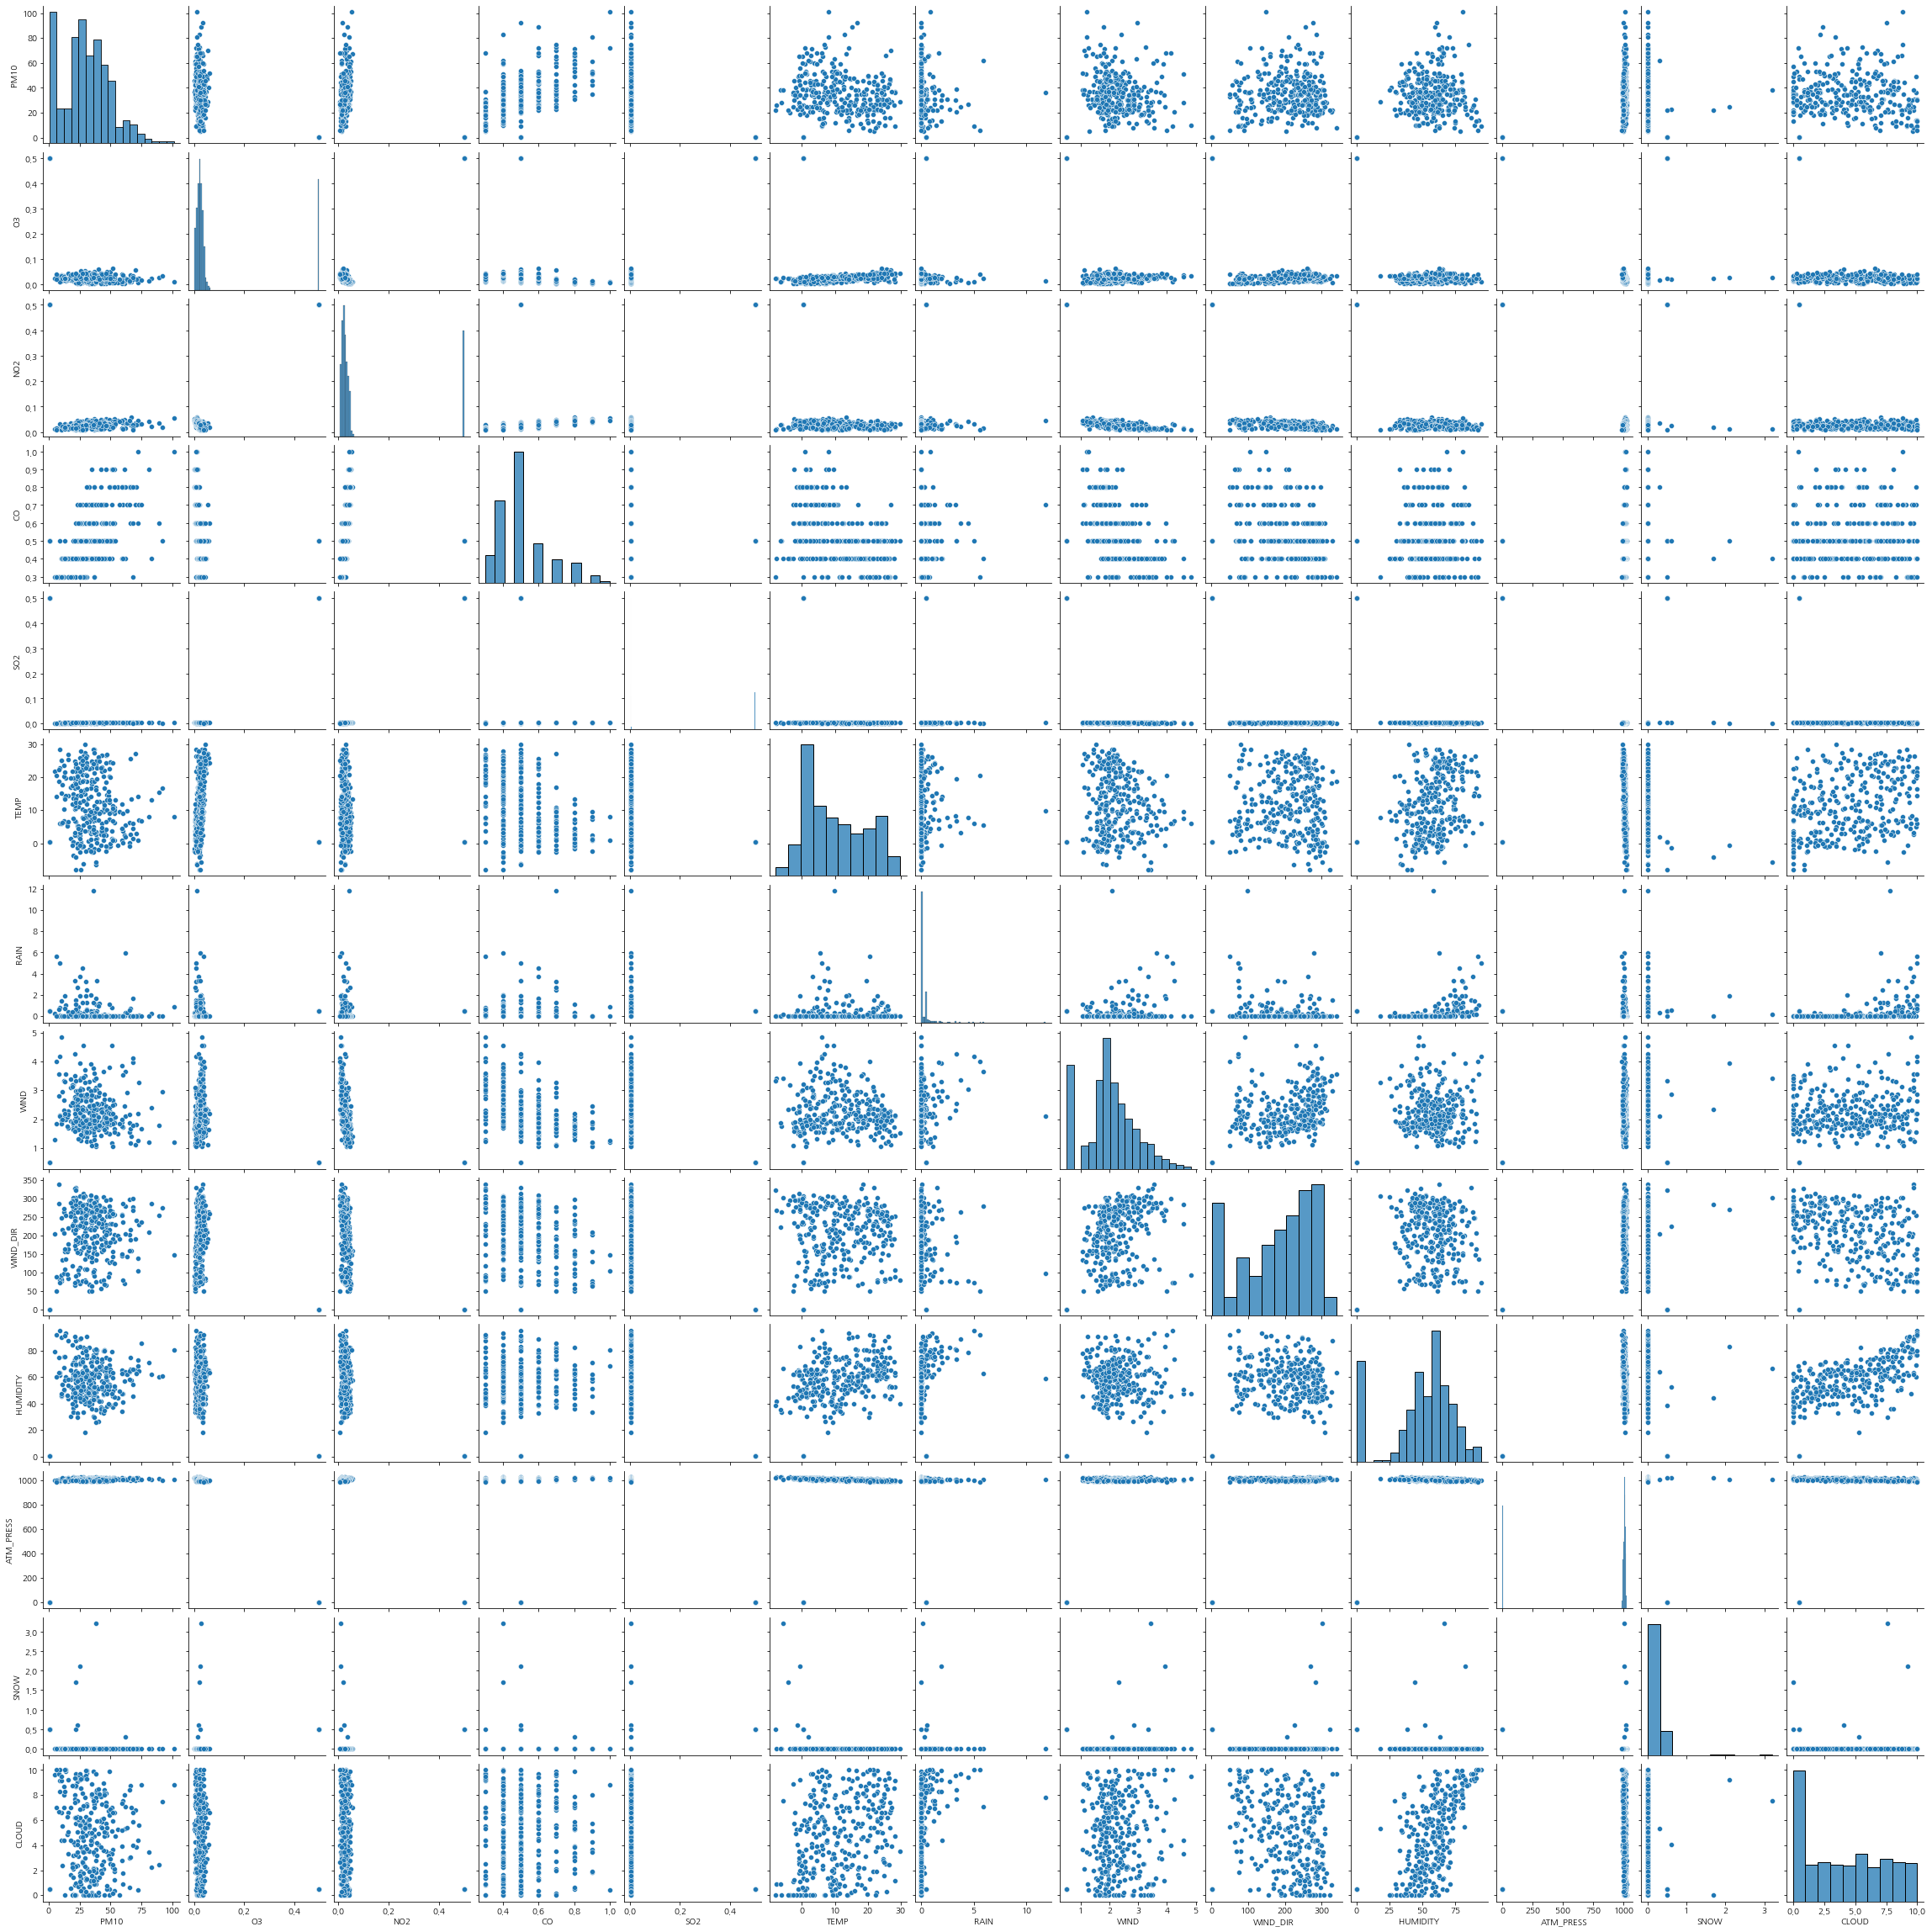

In [21]:
## 스캐터플롯 매트릭스
sns.pairplot(df_raw)

스캐터 플롯 매트릭스를 확인해본 결과 CO, Temp, WIND, WIND_DIR정도가 PM_10과 상관관계가 있어보인다.
- 따라서 이를 별도로 그려본다.
- 또한 어느정도 선형성이 있어 보이는 것 같다.

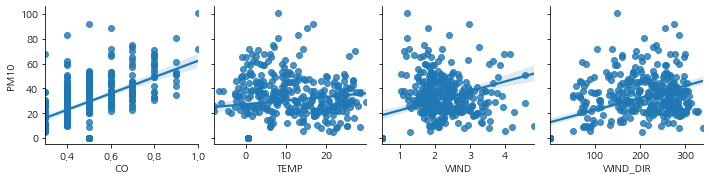

In [22]:
sns.pairplot(df_raw, y_vars=["PM10"], x_vars=["CO", "TEMP", "WIND", "WIND_DIR"],  diag_kind = None, kind="reg")

스캐터 플롯 매트릭스를 확인해본 결과 CO, Temp, WIND, WIND_DIR정도가 PM_10과 상관관계가 있어보여 별도로 그려봤다.
- CO 데이터를 제외하고는 하지만 선형성이 크게 보이지는 않은 듯 보인다.

In [23]:
df_raw.corr().round(3)

,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
PM10,1.000,-0.644,-0.624,0.478,-0.641,0.141,-0.108,0.362,0.501,0.522,0.644,-0.409,0.243
O3,-0.644,1.000,0.994,-0.078,0.998,-0.396,0.067,-0.688,-0.733,-0.843,-0.999,0.602,-0.483
NO2,-0.624,0.994,1.000,0.005,0.998,-0.441,0.076,-0.726,-0.765,-0.843,-0.998,0.596,-0.476
CO,0.478,-0.078,0.005,1.000,-0.041,-0.342,0.040,-0.300,-0.195,0.070,0.052,-0.071,0.055
SO2,-0.641,0.998,0.998,-0.041,1.000,-0.432,0.074,-0.702,-0.749,-0.844,-1.000,0.603,-0.479
TEMP,0.141,-0.396,-0.441,-0.342,-0.432,1.000,-0.042,0.214,0.307,0.520,0.417,-0.397,0.430
RAIN,-0.108,0.067,0.076,0.040,0.074,-0.042,1.000,0.109,-0.194,0.122,-0.079,0.070,0.266
WIND,0.362,-0.688,-0.726,-0.300,-0.702,0.214,0.109,1.000,0.632,0.576,0.699,-0.335,0.355
WIND_DIR,0.501,-0.733,-0.765,-0.195,-0.749,0.307,-0.194,0.632,1.000,0.586,0.749,-0.390,0.149
HUMIDITY,0.522,-0.843,-0.843,0.070,-0.844,0.520,0.122,0.576,0.586,1.000,0.838,-0.492,0.685


- 상관계수를 부여하니 CO, SO2, NO2 순으로 높은 양의 상관관계를 보였고, 
- 다음으로 TEMP가 다음으로 음의 상관관계를 보였다. 5개의 변수를 선택해보면 ATM_PRESS가 상대적으로 높은 상관관계를 보였다.

### 가설검정
- 초기 가설로 미세먼지와 화학적 변화를 일으킬 수 있는 요인들이 있을 것이라고 세웠었다.
- 또한 날씨의 영향을 받을 수 있을 것이라고 가설을 세웠었다.


- 탐색적 분석을 진행하고 난 이후 상관계수 분석에서 화학적 변화를 야기시키는 CO와 SO2, NO2에서 상관관계가 높게 나타났다. 또한 날씨와 관련된 TEMP나 ATM_PRESS도 상관계수가 높게 나왔다.
- 또한 그래프 분석에서도 CO, WIND, WIND_DIR에서 관계가 크지는 않으나 있어보였다. 



- 따라서 탐색적 분석 결과 미세먼지를 발생시키는 화학적 요인들의 경우, 어느 정도 타당한 가설인 것 같다.
- 하지만 날씨의 영향과 관련해서는 조금 더 살펴볼 필요가 있다.

## 3. 모델 선정 및 모델 설계
- 해당 분석의 모델로는 회귀모델로 다중회귀분석, 의사결정나무, 랜덤포레스트, 그레디언트 부스팅 4가지를 사용할 계획이다.
- 해당 모델별로 영향인자를 찾고, MSE, RMSE, MAE, MAPE 성능을 비교해보고자 한다.
    - 영향인자 계산 시에는 데이터 분리하지 않은 원본 데이터 사용 예정
- 또한 주요 IMPORTANCE 변수를 선정해볼 계획이다.

## 1) 다중회귀분석
- 후진제거법으로 변수를 선정

In [24]:
# 목표변수 분리된 모델 사용
#sklearn의 선형회귀모델
model = LinearRegression()

# n_features_to_select는 y에 영향을 주는 설명변수의 개수 7개 설정
rfe = RFE(estimator=model, n_features_to_select = 7).fit(df_raw_x, df_raw_y)

#선택된 변수
selected_cols = df_raw_x.columns[rfe.support_]

# 제거된 변수
removed_cols = df_raw_x.columns[~rfe.support_]

print("Selected Variables: {}".format(selected_cols))
print("Removed Variables: {}".format(removed_cols))

Selected Variables: Index(['O3', 'NO2', 'CO', 'SO2', 'RAIN', 'WIND', 'SNOW'], dtype='object')
Removed Variables: Index(['TEMP', 'WIND_DIR', 'HUMIDITY', 'ATM_PRESS', 'CLOUD'], dtype='object')


In [29]:
" + ".join(selected_cols)
lr_model = smf.ols(formula = "PM10 ~ " + " + ".join(selected_cols), \
                       data = df_raw)
lr_result = lr_model.fit()
print(lr_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     132.3
Date:                Fri, 05 Mar 2021   Prob (F-statistic):           1.09e-87
Time:                        00:28:34   Log-Likelihood:                -1385.9
No. Observations:                 365   AIC:                             2786.
Df Residuals:                     358   BIC:                             2813.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -33.0169      5.654     -5.840      0.0

- 모델의 Adj R squared값은 68.3%의 설명력을 가지고 있다.
- 일부 변수인 NO2와 SNOW의 p-value가 높아보인다.

- 변수의 개수를 줄여봐야겠다.

In [26]:
# 목표변수 분리된 모델 사용
#sklearn의 선형회귀모델
model = LinearRegression()

# n_features_to_select는 y에 영향을 주는 설명변수의 개수 6개 설정 
rfe = RFE(estimator=model, n_features_to_select = 6).fit(df_raw_x, df_raw_y)

#선택된 변수
selected_cols = df_raw_x.columns[rfe.support_]

# 제거된 변수
removed_cols = df_raw_x.columns[~rfe.support_]

print("Selected Variables: {}".format(selected_cols))
print("Removed Variables: {}".format(removed_cols))

Selected Variables: Index(['O3', 'NO2', 'CO', 'SO2', 'RAIN', 'WIND'], dtype='object')
Removed Variables: Index(['TEMP', 'WIND_DIR', 'HUMIDITY', 'ATM_PRESS', 'SNOW', 'CLOUD'], dtype='object')


In [28]:
" + ".join(selected_cols)
lr_model = smf.ols(formula = "PM10 ~ " + " + ".join(selected_cols), \
                       data = df_raw)
lr_result = lr_model.fit()
print(lr_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     132.3
Date:                Fri, 05 Mar 2021   Prob (F-statistic):           1.09e-87
Time:                        00:28:31   Log-Likelihood:                -1385.9
No. Observations:                 365   AIC:                             2786.
Df Residuals:                     358   BIC:                             2813.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -33.0169      5.654     -5.840      0.0

#### 변수의 개수를 5개로 줄였을 때
- 모델의 Adj R squared값은 67.7%의 설명력을 가진다. 변수를 두 개 줄였을 때(5개) 설명력이 줄어들었다. 또한 여전히 NO2의 p-value값도 높다.


- 따라서 이왕이면, 날씨 데이터인 WIND, SNOW, RAIN 변수가 포함된 변수가 7개인 모델을 사용하고자 한다. 다만 SNOW의 p-value가 너무 좋지 않다. 따라서 RFE에서 해당 변수가 빠진 변수 6개의 모델을 사용해보고자 한다.

#### 변수의 개수를 6개로 줄였을 때
- 모델의 Adj R squared값이 68.4%의 설명력으로 0.1%가 증가하게 됐다.또한 여전히 NO2의 p-value값도 낮아졌다.

- 따라서 다중선형회귀분석에서는 변수가 6개인 모델을 사용하도록 하겠다.

- 변수 중요도 확인(표준화 적용)

In [64]:
# 설명변수 표준화 적용
scaler = StandardScaler()
cols = df_raw_x.columns

np_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(np_scaled, columns = cols)

df_scaled["PM10"] = df_raw["PM10"]
reg_model_scaled = smf.ols(formula = "PM10 ~ " + " + ".join(selected_cols), data = df_scaled)

lr_result_scaled = reg_model_scaled.fit()
print(reg_result_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     117.1
Date:                Thu, 04 Mar 2021   Prob (F-statistic):           3.17e-81
Time:                        00:01:17   Log-Likelihood:                -1396.5
No. Observations:                 364   AIC:                             2807.
Df Residuals:                     357   BIC:                             2834.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.4235      0.594     51.242      0.0

<AxesSubplot:>

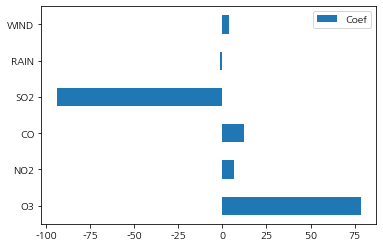

In [65]:
df_reg_coef = pd.DataFrame({"Coef": reg_result_scaled.params.values[1:]}, \
                          index = selected_cols)
df_reg_coef.plot.barh(y = "Coef", legend = True)

### 변수의 중요도
- 선형 회귀에서 변수의 중요도는 SO2, O3, CO, NO2, WIND, RAIN 순서대로라고 할 수 있다.

## 2) 의사결정나무
- 트레이닝셋과 데이터 셋 6:4비율로 나눠서 테스트 진행
- 파라미터는 GridSearch 활용

### 데이터 분할

In [18]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, 
                                                                test_size=0.4, random_state=1234)
print("train data X size: {}".format(df_train_x.shape))
print("train data Y size: {}".format(df_train_y.shape))
print("test data X size: {}".format(df_test_x.shape))
print("test data Y size: {}".format(df_test_y.shape))

train data X size: (219, 12)
train data Y size: (219,)
test data X size: (146, 12)
test data Y size: (146,)


In [19]:
dt_uncustomized = DecisionTreeRegressor(random_state=1234)
dt_uncustomized.fit(df_train_x, df_train_y)

# Train 데이터 설명력
print("Score on training set: {:.3f}".format(dt_uncustomized.score(df_train_x, df_train_y)))

#test데이터 설명력
print("Score on test set: {:.3f}".format(dt_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 1.000
Score on test set: 0.386


### 그리드 서치

In [88]:
estimator = DecisionTreeRegressor()

# 리프 노드 수
para_leaf = [n_leaf * 1 for n_leaf in range(1, 20)]
# 스플릿 최소 자료 수
para_split = [n_leaf * 2 for n_leaf in range(2, 20)]
# 트리 깊이
para_depth = [depth for depth in range(1, 10)]


# criterion은 mae와 mse만 비교
param_grid = {"max_depth": para_depth, "min_samples_split": para_split, 
              "min_samples_leaf": para_leaf}

grid_dt = GridSearchCV(estimator, param_grid, scoring="r2", n_jobs=-1)
grid_dt.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_dt.best_estimator_))
print("best parmater: \n{}".format(grid_dt.best_params_))
print("nbest score: \n{}".format(grid_dt.best_score_.round(3)))

best estimator model: 
DecisionTreeRegressor(max_depth=7, min_samples_leaf=3, min_samples_split=8)
best parmater: 
{'max_depth': 7, 'min_samples_leaf': 3, 'min_samples_split': 8}
nbest score: 
0.561


### 그리드 서치 성능이 안 나오므로 임의로 돌려보기로 계획함
- 이파리 노드, 스플릿, 깊이

In [123]:
train_score = []; test_score = []

para_leaf = [n_leaf * 1 for n_leaf in range(1, 20)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf=v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSampleLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

In [124]:
df_score_leaf.round(3)

,MinSampleLeaf,TrainScore,TestScore
0,1,1.000,0.386
1,2,0.943,0.442
2,3,0.914,0.483
3,4,0.862,0.509
4,5,0.813,0.520
5,6,0.792,0.507
6,7,0.781,0.538
7,8,0.762,0.534
8,9,0.746,0.567
9,10,0.741,0.560


- leaf에서 18 선정

In [139]:
train_score = []; test_score = []
para_split = [n_leaf * 2 for n_leaf in range(2, 20)]

for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf=18,
                                 min_samples_split=v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score

In [140]:
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.681,0.573
1,6,0.681,0.573
2,8,0.681,0.573
3,10,0.681,0.573
4,12,0.681,0.573
5,14,0.681,0.573
6,16,0.681,0.573
7,18,0.681,0.573
8,20,0.681,0.573
9,22,0.681,0.573


- leaf가 18로 가져감으로 모든 값이 똑같게 나와서, 이전에 GridSearch한 값 이용
- split에서 8선정

In [141]:
train_score = []; test_score = []

para_depth = [depth for depth in range(1, 10)]

for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(random_state=1234, max_depth=v_max_depth,
                                 min_samples_leaf=18, min_samples_split=8)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_depth = pd.DataFrame()
df_score_depth["MaxDepth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score

In [142]:
df_score_depth.round(3)

,MaxDepth,TrainScore,TestScore
0,1,0.410,0.415
1,2,0.529,0.502
2,3,0.579,0.471
3,4,0.676,0.570
4,5,0.681,0.573
5,6,0.681,0.573
6,7,0.681,0.573
7,8,0.681,0.573
8,9,0.681,0.573


- 깊이에서 5선정

In [23]:
### GridSearchScore
dt_model = DecisionTreeRegressor(min_samples_leaf= 3, min_samples_split=8,
                                 max_depth=7,random_state=1234)
dt_result = dt_model.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("GS Score on training set: {:.3f}".format(dt_model.score(df_train_x, df_train_y)))
#test데이터 설명력
print("GS Score on test set: {:.3f}".format(dt_model.score(df_test_x, df_test_y)))

GS Score on training set: 0.875
GS Score on test set: 0.440


In [24]:
## 해당 모델 사용

### 직접 구한 매개변수
dt_model = DecisionTreeRegressor(min_samples_leaf= 18, min_samples_split=8,
                                 max_depth=5, random_state=1234)
dt_result = dt_model.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(dt_model.score(df_train_x, df_train_y)))
#test데이터 설명력
print("Score on test set: {:.3f}".format(dt_model.score(df_test_x, df_test_y)))

Score on training set: 0.681
Score on test set: 0.573


- 매개변수를 구해본 결과 grid saerch를 사용했을 때보다 test 셋의 성능은 0.133 증가했고, training set은 0.194 정도 감소한 모습을 보여준다.


- 하지만 결국 모델은 예측에서 좋은 성능을 보여주는 것이 중요하다고 생각되므로, 매개변수를 직접 구한 모델을 이용하도록 하겠다.

### 결론

### 트리그리기

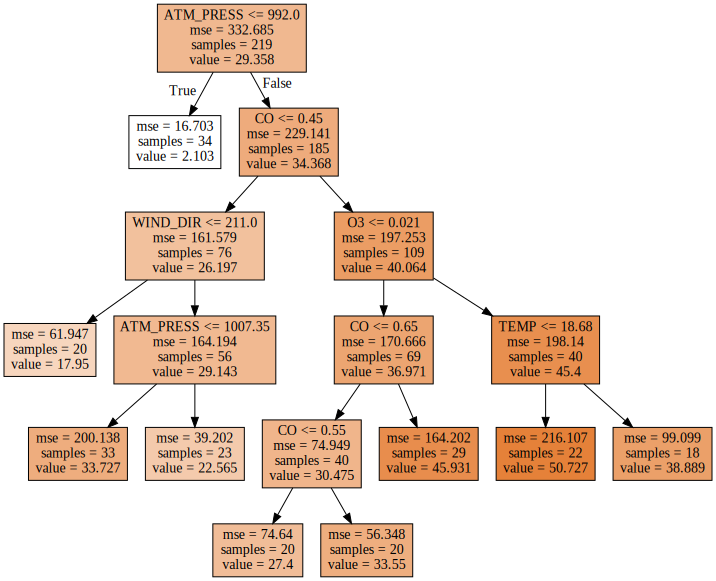

In [28]:
v_feature_name = df_train_x.columns
export_graphviz(dt_result, out_file = "tree_leaf.dot", feature_names = v_feature_name,
                impurity=True, filled = True) # filled 색으로 영향력 표시

with open("tree_leaf.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [105]:
v_feature_name = df_train_x.columns
df_importance = pd.DataFrame()
df_importance["Feature"]=v_feature_name
df_importance["Importance"] = dt_model.feature_importances_


df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
9,ATM_PRESS,0.637
2,CO,0.262
7,WIND_DIR,0.037
0,O3,0.036
4,TEMP,0.028
1,NO2,0.000
3,SO2,0.000
5,RAIN,0.000
6,WIND,0.000
8,HUMIDITY,0.000


Text(0, 0.5, '변수')

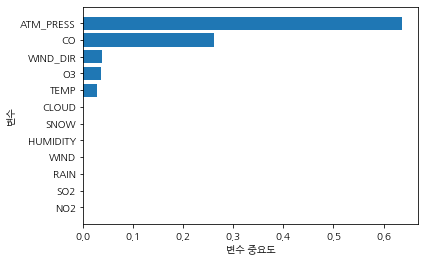

In [106]:
df_importance.sort_values("Importance", ascending= True, inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

- ATM-PRESS, CO에서 강한 중요도를 보여주고, WIND_DIR, O3, TEMP는 순으로 다른 변수보다는 낮은 중요도를 보여주고 있다.

## 3. 랜덤포레스트
- 랜덤포레스트 파라미터 직접 구해서 계산

In [32]:
rf_uncustomized = RFR(random_state=1234)
rf_uncustomized.fit(df_train_x, df_train_y)

# Train 데이터 설명력
print("Score on training set: {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))

#test데이터 설명력
print("Score on test set: {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 0.944
Score on test set: 0.640


### Estimator: 40선정

In [110]:
train_score = []; test_score = []

para_n_tree = [n_tree * 10 for n_tree in range(1, 11)]

for v_n_estimators in para_n_tree:
    rf = RFR(random_state=1234, n_estimators = v_n_estimators)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["n_estimators"] = para_n_tree
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

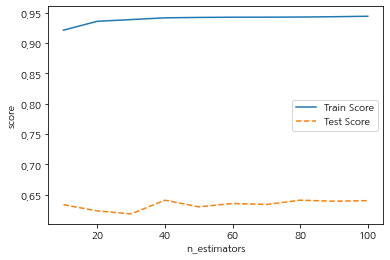

In [111]:
plt.plot(para_n_tree, train_score, linestyle="-", label = "Train Score")
plt.plot(para_n_tree, test_score, linestyle="--", label = "Test Score")
plt.xlabel("n_estimators")
plt.ylabel("score")
plt.legend()

### min_samples_leaf: 2 선정

In [117]:
train_score = []; test_score = []

para_leaf = [n_leaf * 1 for n_leaf in range(1, 21)]

for v_min_samples_leaf in para_leaf:
    rf = RFR(random_state=1234, n_estimators = 40, min_samples_leaf = v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

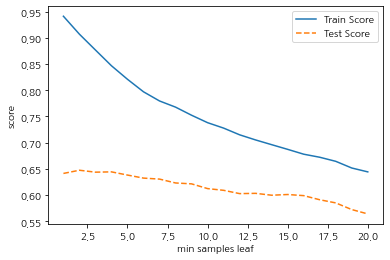

In [118]:
plt.plot(para_leaf, train_score, linestyle="-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle="--", label = "Test Score")
plt.xlabel("min samples leaf")
plt.ylabel("score")
plt.legend()

### min_samples_split: 6선정

In [152]:

train_score = []; test_score = []

para_split = [n_split * 2 for n_split in range(2, 21)]

for v_min_samples_split in para_split:
    rf = RFR(random_state=1234, n_estimators = 40, min_samples_leaf = 2, 
             min_samples_split=v_min_samples_split)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesSplit"] = para_split
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

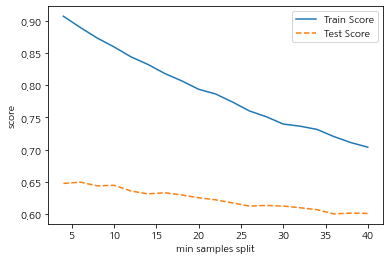

In [153]:
plt.plot(para_split, train_score, linestyle="-", label = "Train Score")
plt.plot(para_split, test_score, linestyle="--", label = "Test Score")
plt.xlabel("min samples split")
plt.ylabel("score")
plt.legend()

In [147]:
# 모델 설명력 확인
df_score_leaf.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.907,0.647
1,6,0.889,0.649
2,8,0.873,0.644
3,10,0.859,0.644
4,12,0.844,0.636
5,14,0.832,0.631
6,16,0.818,0.633
7,18,0.807,0.629
8,20,0.794,0.625
9,22,0.786,0.622


### MaxDepth: 5 선정

In [157]:
train_score = []; test_score = []

para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    rf = RFR(random_state=1234, n_estimators = 100, min_samples_leaf = 6, 
             min_samples_split=6, max_depth=v_max_depth)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["Maxdepth"] = para_depth
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

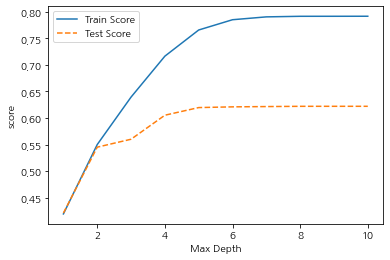

In [158]:
plt.plot(para_depth, train_score, linestyle="-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle="--", label = "Test Score")
plt.xlabel("Max Depth")
plt.ylabel("score")
plt.legend()

In [159]:
# 모델 설명력 확인
df_score_leaf.round(3)

,Maxdepth,TrainScore,TestScore
0,1,0.419,0.421
1,2,0.550,0.545
2,3,0.639,0.560
3,4,0.716,0.605
4,5,0.766,0.620
5,6,0.785,0.621
6,7,0.790,0.622
7,8,0.791,0.622
8,9,0.791,0.622
9,10,0.791,0.622


In [33]:
rf_final = RFR(random_state=1234, n_estimators = 40, min_samples_leaf = 2, 
             min_samples_split=6, max_depth=5)
rf_final.fit(df_train_x, df_train_y)

# Train 데이터 설명력
print("Score on training set: {:.3f}".format(rf_final.score(df_train_x, df_train_y)))

#test데이터 설명력
print("Score on test set: {:.3f}".format(rf_final.score(df_test_x, df_test_y)))

Score on training set: 0.796
Score on test set: 0.627


- 테스트 데이터의 성능이 0.013만큼 줄긴 했으나 트레이닝 데이터에 대한 과적합이 줄어들었다고 할 수 있다.

### 결론

In [162]:
df_importance = pd.DataFrame()
df_importance["Feature"]=v_feature_name
df_importance["Importance"] = rf_final.feature_importances_


df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
9,ATM_PRESS,0.494
2,CO,0.207
0,O3,0.090
7,WIND_DIR,0.057
6,WIND,0.047
8,HUMIDITY,0.028
11,CLOUD,0.024
1,NO2,0.020
4,TEMP,0.018
5,RAIN,0.008


Text(0, 0.5, '변수(feature)')

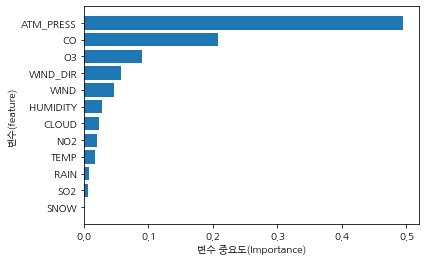

In [163]:
df_importance.sort_values("Importance", ascending= True, inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도(Importance)")
plt.ylabel("변수(feature)")

- 변수의 중요도는 ATM_PRESS, CO, O3, WIND_DIR, WIND 순으로 나타난다.
- 6번째 순위에 HUMIDITY가 등장했다.

## 4. Gradient Boosting

In [165]:
gb_uncustomized = GBR(random_state=1234)
gb_uncustomized.fit(df_train_x, df_train_y)

# Train 데이터 설명력
print("Score on training set: {:.3f}".format(gb_uncustomized.score(df_train_x, df_train_y)))

#test데이터 설명력
print("Score on test set: {:.3f}".format(gb_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 0.967
Score on test set: 0.695


### estimators: 60

In [168]:
train_score = []; test_score = []

para_n_tree = [n_tree * 10 for n_tree in range(1, 11)]

for v_n_estimators in para_n_tree:
    gb = GBR(random_state=1234, n_estimators = v_n_estimators)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["n_estimators"] = para_n_tree
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

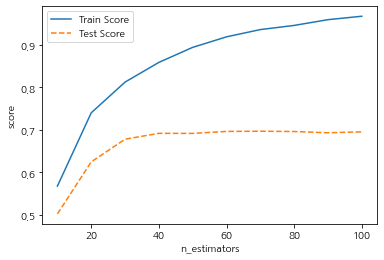

In [169]:
plt.plot(para_n_tree, train_score, linestyle="-", label = "Train Score")
plt.plot(para_n_tree, test_score, linestyle="--", label = "Test Score")
plt.xlabel("n_estimators")
plt.ylabel("score")
plt.legend()

In [170]:
df_score_leaf.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.568,0.503
1,20,0.740,0.625
2,30,0.812,0.678
3,40,0.858,0.692
4,50,0.894,0.692
5,60,0.918,0.696
6,70,0.935,0.697
7,80,0.945,0.696
8,90,0.959,0.693
9,100,0.967,0.695


### Min Sample Leaf: 2 선정

In [171]:
train_score = []; test_score = []

para_leaf = [n_leaf * 1 for n_leaf in range(1, 21)]

for v_min_samples_leaf in para_leaf:
    gb = GBR(random_state=1234, n_estimators = 60, min_samples_leaf = v_min_samples_leaf)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

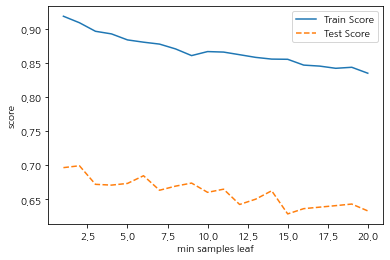

In [173]:
plt.plot(para_leaf, train_score, linestyle="-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle="--", label = "Test Score")
plt.xlabel("min samples leaf")
plt.ylabel("score")
plt.legend()

In [176]:
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.918,0.696
1,2,0.909,0.699
2,3,0.896,0.672
3,4,0.892,0.671
4,5,0.884,0.673
5,6,0.880,0.684
6,7,0.877,0.663
7,8,0.870,0.669
8,9,0.861,0.674
9,10,0.866,0.660


### Min Sample Split: 16 선정

In [177]:
train_score = []; test_score = []

para_split = [n_split * 2 for n_split in range(2, 21)]

for v_min_samples_split in para_split:
    gb = GBR(random_state=1234, n_estimators = 60, min_samples_leaf = 2, 
             min_samples_split=v_min_samples_split)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesSplit"] = para_split
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

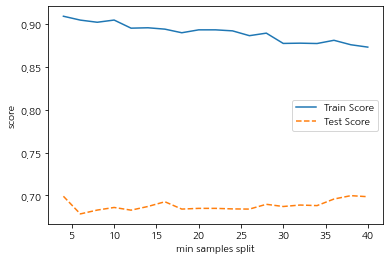

In [180]:
plt.plot(para_split, train_score, linestyle="-", label = "Train Score")
plt.plot(para_split, test_score, linestyle="--", label = "Test Score")
plt.xlabel("min samples split")
plt.ylabel("score")
plt.legend()

In [179]:
# 모델 설명력 확인
df_score_leaf.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.909,0.699
1,6,0.904,0.678
2,8,0.902,0.683
3,10,0.904,0.686
4,12,0.895,0.683
5,14,0.895,0.687
6,16,0.894,0.693
7,18,0.890,0.684
8,20,0.893,0.685
9,22,0.893,0.685


### MaxDepth: 3선정

In [181]:
train_score = []; test_score = []

para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    gb = GBR(random_state=1234, n_estimators = 60, min_samples_leaf = 2, 
             min_samples_split=16, max_depth=v_max_depth)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["Maxdepth"] = para_depth
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

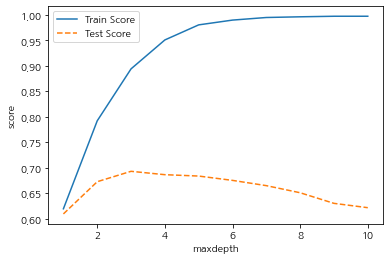

In [183]:
plt.plot(para_depth, train_score, linestyle="-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle="--", label = "Test Score")
plt.xlabel("maxdepth")
plt.ylabel("score")
plt.legend()

In [184]:
# 모델 설명력 확인
df_score_leaf.round(3)

,Maxdepth,TrainScore,TestScore
0,1,0.619,0.609
1,2,0.792,0.672
2,3,0.894,0.693
3,4,0.950,0.686
4,5,0.980,0.683
5,6,0.989,0.675
6,7,0.995,0.665
7,8,0.996,0.651
8,9,0.997,0.630
9,10,0.997,0.621


### LearningRate: 0.1선정

In [185]:
train_score = []; test_score = []

para_lr = [lr*0.1 for lr in range(1, 10)]

for v_learning_rate in para_lr:
    gb = GBR(random_state=1234, n_estimators = 60, min_samples_leaf = 2, 
             min_samples_split=16, max_depth=3, learning_rate=v_learning_rate)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["LearningRate"] = para_lr
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

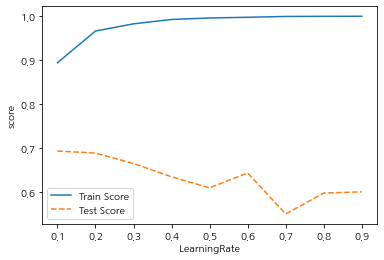

In [188]:
plt.plot(para_lr, train_score, linestyle="-", label = "Train Score")
plt.plot(para_lr, test_score, linestyle="--", label = "Test Score")
plt.xlabel("LearningRate")
plt.ylabel("score")
plt.legend()

In [187]:
# 모델 설명력 확인
df_score_leaf.round(3)

,LearningRate,TrainScore,TestScore
0,0.1,0.894,0.693
1,0.2,0.966,0.688
2,0.3,0.982,0.664
3,0.4,0.992,0.634
4,0.5,0.996,0.609
5,0.6,0.997,0.643
6,0.7,0.999,0.549
7,0.8,0.999,0.597
8,0.9,1.000,0.600


### 결론 도출

In [189]:
gb_final = GBR(random_state=1234, n_estimators = 60, min_samples_leaf = 2, 
             min_samples_split=16, max_depth=3, learning_rate=0.1)
gb_final.fit(df_train_x, df_train_y)

# Train 데이터 설명력
print("Score on training set: {:.3f}".format(gb_final.score(df_train_x, df_train_y)))

#test데이터 설명력
print("Score on test set: {:.3f}".format(gb_final.score(df_test_x, df_test_y)))

Score on training set: 0.894
Score on test set: 0.693


- 초기값  
Score on training set: 0.967  
Score on test set: 0.695

초기값보다 많이 나아진 모습을 보임. test성능이 0.02줄어든 반면, training data에 대한 과적합이 크게 줄었음을 확인할 수 있다.

### 설명변수 중요도

In [190]:
v_feature_name = df_train_x.columns
df_importance = pd.DataFrame()
df_importance["Feature"]=v_feature_name
df_importance["Importance"] = gb_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
9,ATM_PRESS,0.452
2,CO,0.209
0,O3,0.102
7,WIND_DIR,0.065
4,TEMP,0.048
8,HUMIDITY,0.035
6,WIND,0.033
11,CLOUD,0.029
5,RAIN,0.020
1,NO2,0.005


Text(0, 0.5, '변수(feature)')

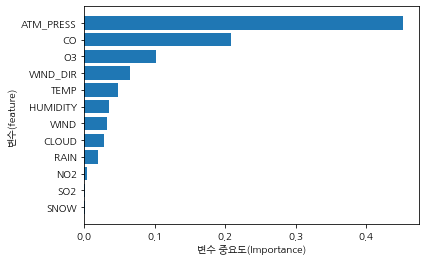

In [191]:
df_importance.sort_values("Importance", ascending= True, inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도(Importance)")
plt.ylabel("변수(feature)")

- 변수의 중요도는 ATM_PRESS, CO, O3, WIND_DIR, TEMP 순으로 나타난다.
- ATM_PRESS, CO, O3는 특히 강한 중요도를 보여준다.
- RF와 마찬가지로 6번째 순위에 HUMIDITY(습도)가 등장했다.

# 4. 모델 예측 및 평가

In [201]:
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def mean_absolute_percenatage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) *  100

In [202]:
models=["Regression", "Decision Tree", "Random Forest", "Gradient Boosting"]

# 평가 리스트 초기화
mse, rmse, mae, mape = [], [], [], []

1) Regression

In [203]:
lr_y_pred = lr_result.predict(df_test_x)

mse.append(mean_squared_error(df_test_y, lr_y_pred))
rmse.append(root_mean_squared_error(df_test_y, lr_y_pred))
mae.append(mean_absolute_error(df_test_y, lr_y_pred))
mape.append(mean_absolute_percenatage_error(df_test_y, lr_y_pred))

2) Decision Tree

In [204]:
dt_y_pred = dt_model.predict(df_test_x)

mse.append(mean_squared_error(df_test_y, dt_y_pred))
rmse.append(root_mean_squared_error(df_test_y, dt_y_pred))
mae.append(mean_absolute_error(df_test_y, dt_y_pred))
mape.append(mean_absolute_percenatage_error(df_test_y, dt_y_pred))

3) Random Forest

In [205]:
rf_y_pred = rf_final.predict(df_test_x)

mse.append(mean_squared_error(df_test_y, rf_y_pred))
rmse.append(root_mean_squared_error(df_test_y, rf_y_pred))
mae.append(mean_absolute_error(df_test_y, rf_y_pred))
mape.append(mean_absolute_percenatage_error(df_test_y, rf_y_pred))

4) Gradient Boosting

In [206]:
gb_y_pred = gb_final.predict(df_test_x)

mse.append(mean_squared_error(df_test_y, gb_y_pred))
rmse.append(root_mean_squared_error(df_test_y, gb_y_pred))
mae.append(mean_absolute_error(df_test_y, gb_y_pred))
mape.append(mean_absolute_percenatage_error(df_test_y, gb_y_pred))

### 평가 시각화

Text(0.5, 1.0, 'mape')

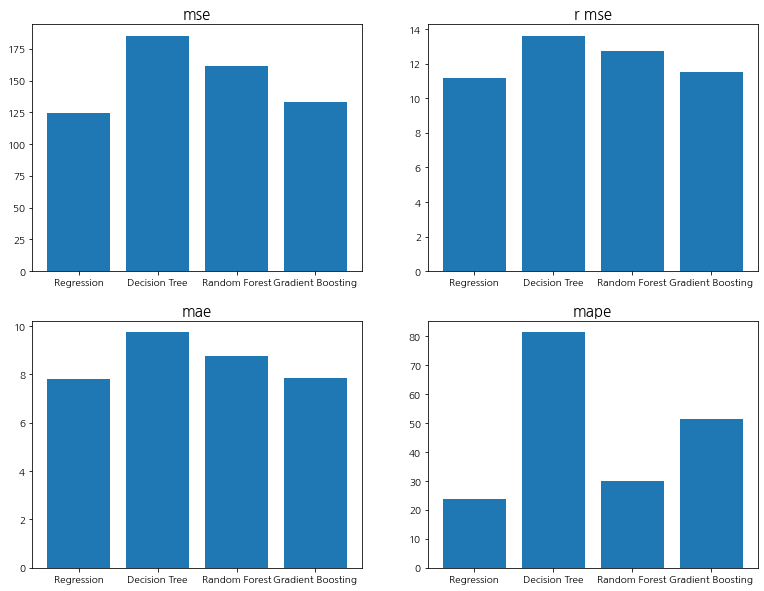

In [207]:
## 그래프 커스터 마이징

fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (13, 10))

ax[0, 0].bar(models, mse)
ax[0, 0].set_title("mse", fontsize = 15)

ax[0, 1].bar(models, rmse)
ax[0, 1].set_title("r mse", fontsize = 15)

ax[1, 0].bar(models, mae)
ax[1, 0].set_title("mae", fontsize = 15)

ax[1, 1].bar(models, mape)
ax[1, 1].set_title("mape", fontsize = 15)

- Regression 모델이 모든 평가 지표에서 가장 점수가 낮게 나왔기에 성능이 가장 좋다고 할 수 있다. 반면에 Decision Tree모델의 성능이 가장 좋지 않다고 할 수 있다. 
- 평가지표별 모델의 정확도 "추세"는 거의 동일하게 나타난다. 다만 mape에서 Gradient boosting이 Random Forest보다 안 좋은 점수를 보여준다.